In [118]:
import pandas as pd
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")


In [119]:
# Cargar los archivos Parquet, al dataset completo lo usaremos para la recomendacion
df_completo = pd.read_parquet(r'..\Datasets\dataset_completo.parquet')

In [120]:
# Revisión de valores nulos
print(df_completo.isnull().sum())

movie_id                      0
actor_name                    0
director_name                 0
director_movie_id             0
budget                        0
original_language             0
overview                      0
popularity                    0
release_date                  0
revenue                       0
runtime                       0
title                         0
vote_average                  0
vote_count                    0
generos                       0
production_countries_clean    0
production_companies_clean    0
spoken_languages_clean        0
release_year                  0
return                        0
dtype: int64


In [121]:
# Calcular el porcentaje de 0s en cada columna relevante, teniendo en cuenta que los pusimos anteriormente para rellenar nulos, dada la salida 'budget' y 'revenue' nos indica que no disponemos de datos basicamente.
for col in ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']:
    porcentaje_cero = (df_completo[col] == 0).mean() * 100
    print(f"El porcentaje de 0s en la columna '{col}' es: {porcentaje_cero:.2f}%")

El porcentaje de 0s en la columna 'budget' es: 87.82%
El porcentaje de 0s en la columna 'revenue' es: 90.13%
El porcentaje de 0s en la columna 'popularity' es: 0.08%
El porcentaje de 0s en la columna 'runtime' es: 2.85%
El porcentaje de 0s en la columna 'vote_average' es: 6.48%
El porcentaje de 0s en la columna 'vote_count' es: 6.32%


In [122]:
df_completo['return'] = df_completo.apply(lambda row: row['revenue'] / row['budget'] if row['budget'] > 0 else 0, axis=1) # calculamos el return en base a revenue y budget
df_completo['return'].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: return, dtype: float64

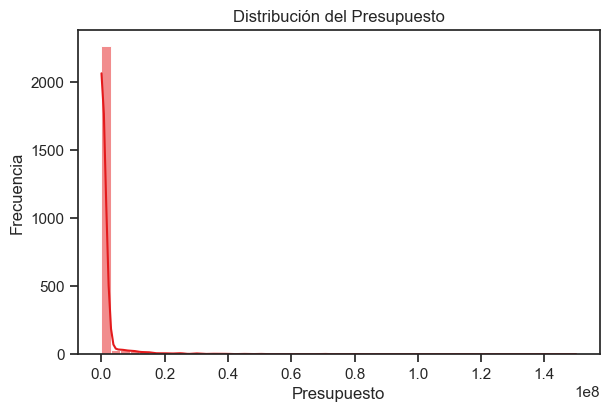

In [123]:
# Cambiar el backend de matplotlib a inline para Jupyter Notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# Distribución del presupuesto
plt.figure(figsize=(6, 4))
sns.histplot(df_completo['budget'], bins=50, kde=True)
plt.title('Distribución del Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

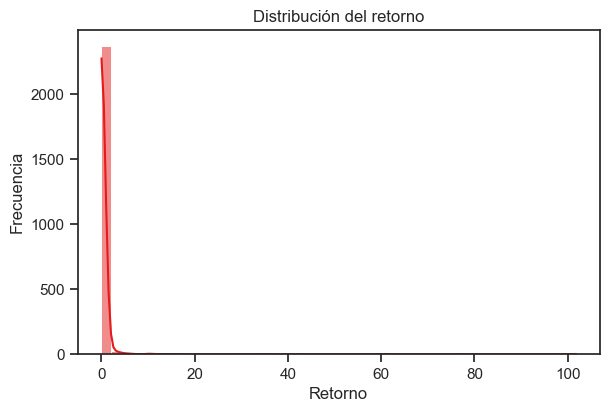

In [124]:
# Distribución del retorno
plt.figure(figsize=(6, 4))
sns.histplot(df_completo['return'], bins=50, kde=True)
plt.title('Distribución del retorno')
plt.xlabel('Retorno')
plt.ylabel('Frecuencia')
plt.show()

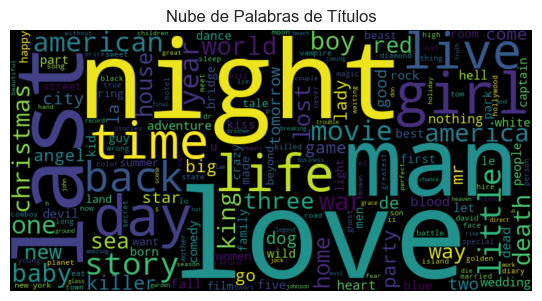

In [125]:
# las palabras más usada en los titulos
wordcloud = WordCloud(width=800, height=400).generate(" ".join(df_completo['title'].dropna()))
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()

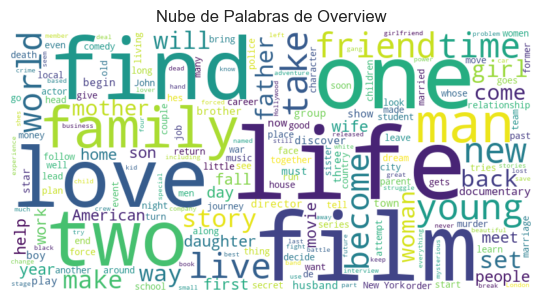

In [126]:
# Combina todos los textos del campo 'overview' en una sola cadena, siendo las palabras que mas se repiten en las descripciones
text_overview = " ".join(df_completo['overview'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_overview)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Overview')
plt.show()

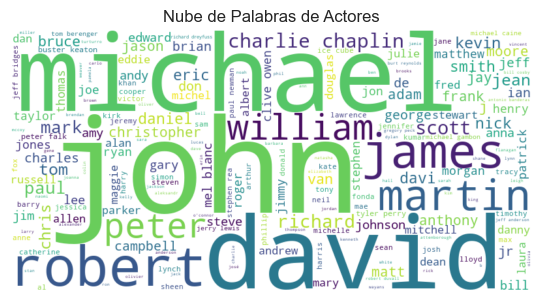

In [127]:
df_actor = pd.read_parquet(r'..\Datasets\actor_dataset.parquet')
# Combina todos los nombres de actores en una sola cadena
text_actors = " ".join(df_actor['actor_name'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_actors)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Actores')
plt.show()
# tenemos a john como el actor que mas se repite y es el que mas filmaciones tiene

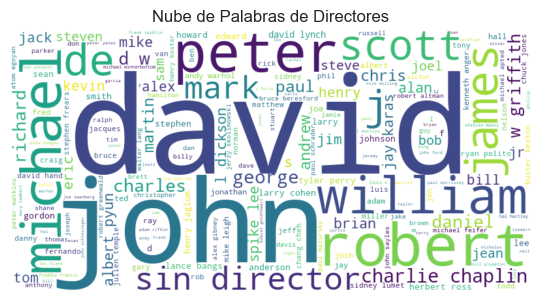

In [128]:
# Combina todos los nombres de directores en una sola cadena
df_director = pd.read_parquet(r'..\Datasets\director_dataset.parquet')
text_directors = " ".join(df_director['director_name'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_directors)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Directores')
plt.show()

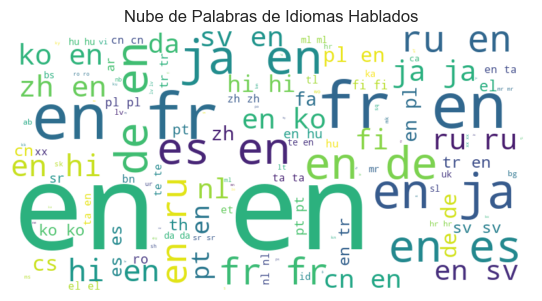

In [129]:
# Combina todos los idiomas en una sola cadena, el ingles y el frances son los mas mencionados, por eso usamos el idioma inglés como criterio para el filtrado de peliculas
df_idioma = pd.read_parquet(r'..\Datasets\datasetmovies_reducido.parquet')
text_languages = " ".join(df_idioma['original_language'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_languages)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Idiomas Hablados')
plt.show()

In [130]:
# Verificar que todas las cadenas estén correctamente formateadas
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   movie_id                    2422 non-null   int64         
 1   actor_name                  2422 non-null   object        
 2   director_name               2422 non-null   object        
 3   director_movie_id           2422 non-null   float64       
 4   budget                      2422 non-null   int32         
 5   original_language           2422 non-null   object        
 6   overview                    2422 non-null   object        
 7   popularity                  2422 non-null   float64       
 8   release_date                2422 non-null   datetime64[ns]
 9   revenue                     2422 non-null   int32         
 10  runtime                     2422 non-null   float64       
 11  title                       2422 non-null   object      

In [131]:
# Guardar el dataset en formato Parquet
df_completo.to_parquet(r'..\Datasets\dataset_completo.parquet')

In [132]:
df_actor = pd.read_parquet(r'..\Datasets\actor_dataset.parquet')
df_actor.tail(5) # para automatizar el proceso elaboramos ddatasets específicos para cada endpoint

,actor_name,title,revenue,budget,return
2417,robert sapolsky,zeitgeist moving forward,0,0,0.0
2418,david bowie,ziggy stardust and the spiders from mars,0,0,0.0
2419,anna brüggemann,zimmerkchebad,0,0,0.0
2420,jessica alexandra green,zombie christ,0,5000,0.0
2421,adam mayfield,zombie wars,0,0,0.0


In [133]:
df_director = pd.read_parquet(r'..\Datasets\director_dataset.parquet')
df_director.tail(5)

,director_name,title,release_date,revenue,budget,return
2417,peter joseph,zeitgeist moving forward,2011-01-15,0,0,0.0
2418,d.a. pennebaker,ziggy stardust and the spiders from mars,1973-12-23,0,0,0.0
2419,dietrich brüggemann,zimmerkchebad,2012-10-03,0,0,0.0
2420,bill zebub,zombie christ,2010-10-27,0,5000,0.0
2421,david a. prior,zombie wars,2006-11-10,0,0,0.0


In [134]:
df_filmaciones = pd.read_parquet(r'..\Datasets\filmaciones.parquet')
df_filmaciones.tail(5)

,title,release_date
2417,zeitgeist moving forward,2011-01-15
2418,ziggy stardust and the spiders from mars,1973-12-23
2419,zimmerkchebad,2012-10-03
2420,zombie christ,2010-10-27
2421,zombie wars,2006-11-10


In [135]:
df_score = pd.read_parquet(r'..\Datasets\score_titulo.parquet')
df_score.tail(5)

,title,release_date,vote_average,popularity
2417,zeitgeist moving forward,2011-01-15,6.9,2.688290
2418,ziggy stardust and the spiders from mars,1973-12-23,7.6,1.167518
2419,zimmerkchebad,2012-10-03,7.1,1.876830
2420,zombie christ,2010-10-27,1.0,0.137117
2421,zombie wars,2006-11-10,4.2,0.412061


In [136]:
df_votos = pd.read_parquet(r'..\Datasets\votos_titulo.parquet')
df_votos.tail(5)

,title,vote_count,vote_average
2417,zeitgeist moving forward,70.0,6.9
2418,ziggy stardust and the spiders from mars,15.0,7.6
2419,zimmerkchebad,28.0,7.1
2420,zombie christ,1.0,1.0
2421,zombie wars,9.0,4.2
